# Implementing Logistic Regression on "Titanic" Dataset

Using the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic), we will try to predict a classification- survival or deceased by implementing Logistic Regression for classification.

## Importing libraries and checking out the dataset.

We will start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualizing the data

Next, we will continue on by visualizing some more of the data

From the dataset's info, we can see that there are some null datas in the 'Age', 'Cabin', and 'Embarked' columns, we can visually see this by mapping it using a heatmap

<Axes: >

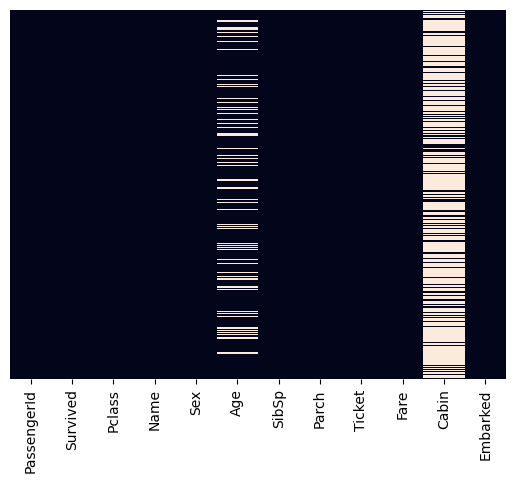

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [6]:
train['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

In [7]:
train['Cabin'].isnull().value_counts()

Cabin
True     687
False    204
Name: count, dtype: int64

In [8]:
train['Embarked'].isnull().value_counts()

Embarked
False    889
True       2
Name: count, dtype: int64

There are about 20% datas in 'Age' that are missing. The missing data is likely small enough for reasonable replacement with some form of imputation. Looking at the 'Cabin' data, it looks like we are missing too much data to do something useful with it. It might be useful with further processing but we will most likely ignore this. There are 2 datas in 'Embarked' that are missing. We will simply remove the row from the data set.

<Axes: xlabel='Survived', ylabel='count'>

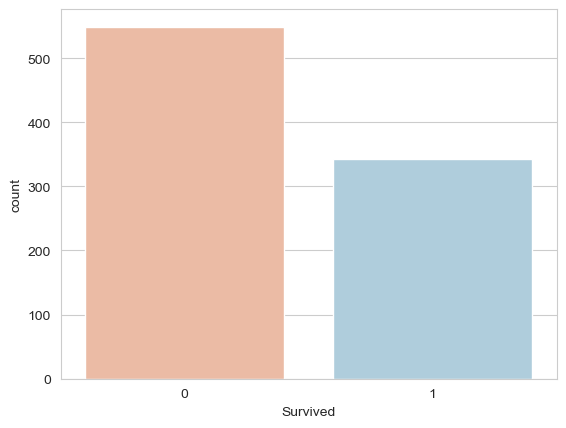

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Survived', palette='RdBu', legend=False)

<Axes: xlabel='Survived', ylabel='count'>

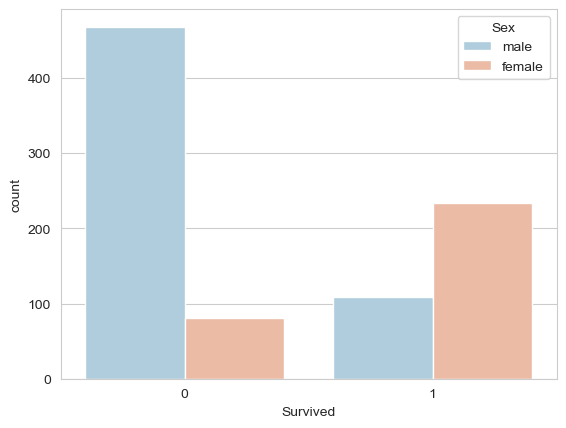

In [10]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

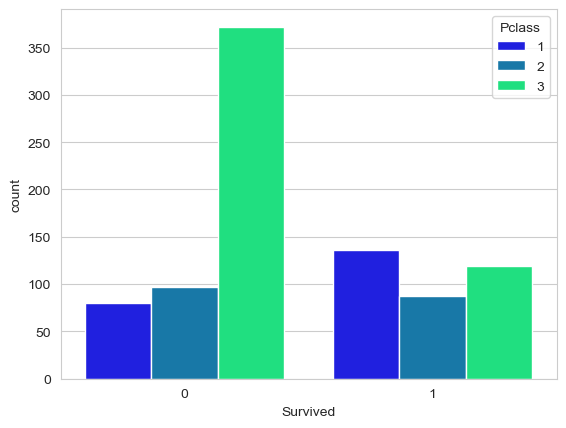

In [11]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='winter')

<Axes: xlabel='Age', ylabel='Count'>

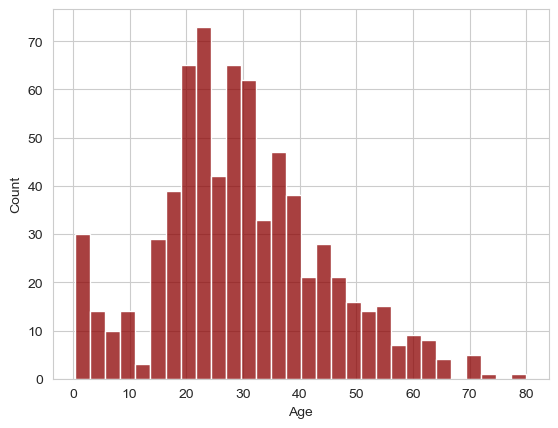

In [12]:
sns.histplot(train['Age'].dropna(),color='darkred', bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

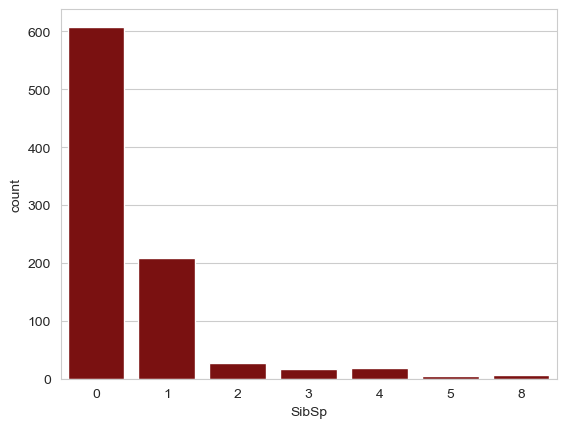

In [13]:
sns.countplot(x='SibSp', data=train, color='darkred')

<Axes: xlabel='Fare', ylabel='Count'>

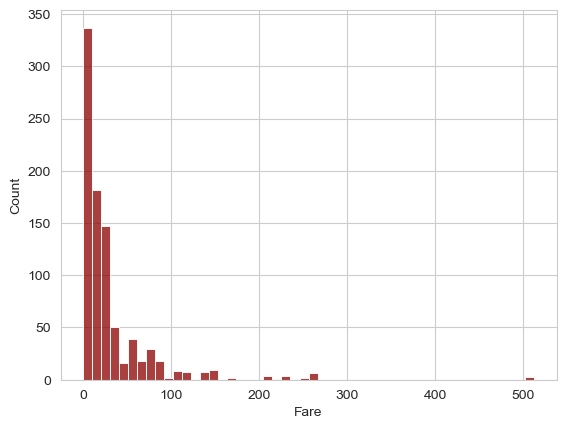

In [14]:
sns.histplot(train['Fare'],color='darkred', bins=50)

## Data Cleaning

We will fill out the null datas in 'Age' column instead of dropping them. We will fill the null data with the mean age of all our passengers mean imputation. We can also be more specific and get the mean age by 'Pclass'.

<Axes: xlabel='Pclass', ylabel='Age'>

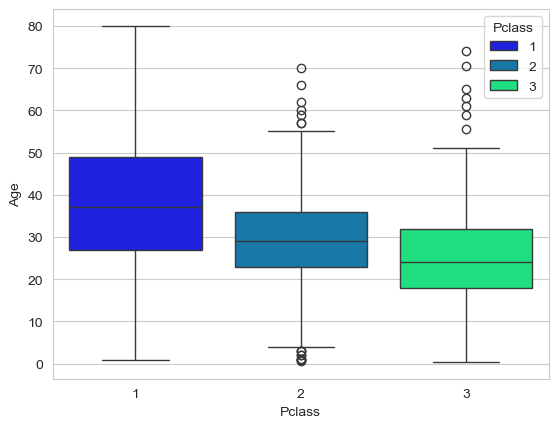

In [15]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter', hue='Pclass')

In [16]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

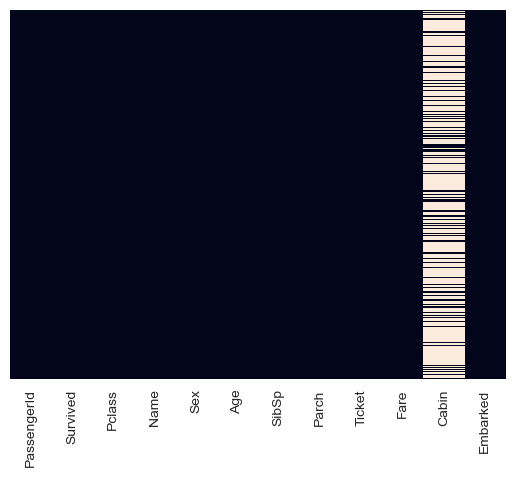

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

Now all the 'Age' column is filled with data.

Next we will convert 'Sex' and 'Embarked' (categorical features) to dummy variables in pandas in order to allow the model to take those variables as inputs

In [19]:
sex = pd.get_dummies(train['Sex'], drop_first=True, dtype='int')
embarked = pd.get_dummies(train['Embarked'], drop_first=True, dtype='int')

In [20]:
train = pd.concat([train, sex, embarked], axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


## Creating and Training the Model

We are going to randomly split the data into training and testing set using train_test_split() method.

70% is kept for training and 30% for testing.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = train['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression(max_iter = 300)

In [27]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [28]:
predictions = logmodel.predict(X_test)

## Model Evaluation

Now, let's check how well our model performs!

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [31]:
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

,Actual Negative,Actual Positive
Predicted Negative,137,30
Predicted Positive,20,81


The results are not bad! We managed to gain accuracy score of 0.81.

From here we can explore other features or datasets.

## Predicting using test.csv

After training our model, next we will do a prediction using the test data. 

The test data is the same as the train data, except it has no 'Survived' column.

In [32]:
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [33]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


We will do the same data cleaning that we did with train data.

In [34]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

sex = pd.get_dummies(test['Sex'], drop_first=True, dtype='int')
embarked = pd.get_dummies(test['Embarked'], drop_first=True, dtype='int')
test = pd.concat([test, sex, embarked], axis=1)

It looks like there is 1 row with missing 'Fare' data. We will do mean imputation to fill in the missing value.

In [35]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,0,1


In [36]:
test.loc[test['Fare'].isnull(), 'Fare'] = 35.627188

In [37]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                    35.627188
Cabin                         NaN
Embarked                        S
male                            1
Q                               0
S                               1
Name: 152, dtype: object

Now we will do model prediction using the test data.

In [38]:
test_X = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [39]:
test_predictions = logmodel.predict(test_X)

In [40]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Now we will convert the result into a readable format and save it as a csv.

In [41]:
result = pd.DataFrame(test_predictions, test['PassengerId'],)

In [42]:
result.columns = ['Survived']

In [43]:
print(result)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [44]:
result.to_csv('result.csv')

## BONUS: Getting the title from 'Name' and using it as a feature.

In [45]:
title = train['Name'].apply(lambda x : x.split(', ')[1].split('.')[0])

In [46]:
title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [47]:
title.count()

891

In [48]:
title = pd.get_dummies(title, drop_first=True, dtype='int')

In [49]:
title.head()

,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
train = pd.concat([train, title], axis=1)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0


In [52]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 
           'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'
           ]]
y = train['Survived']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
logmodel = LogisticRegression(max_iter=500)

In [55]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       157
           1       0.79      0.78      0.79       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



In [58]:
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

,Actual Negative,Actual Positive
Predicted Negative,134,24
Predicted Positive,23,87


We found that adding the name's title as a feature has contributed positively to the model's overall performance, although with an increase in accuracy of only 0.01.

The new model resulted in:
- 3 less true negatives, 6 less false negatives
- 3 more false positives, 6 more true positives